### SVM - Home-made implementation

Recordemos:

Queremos encontrar los mejores valores *w* y *b* en la ecuación `y = wx + b`

usando la restricción:

`y_i * (w * x_i + b) >= 1`

donde y_i ∈ { -1, 1 }

que se refiere a la condición sobre la clasificación "correcta" de un dato (si se clasificó como la categoría A siempre es un 1 y si se clasificó como la categoría B siempre es un -1).

La implementación más común (que he visto) usa una *función de pérdidas*.
Básicamente, retorna un valor que representa la pérdida durante la clasificación, en caso de no haber sido clasificado correctamente un dato.

`l = max(0, 1 - y_i * (w * x_i + b))`, es decir,

```
if se clasificó bien
  l = 0
else
  l = 1 - y * (w * x_i + b)
```

Para evitar sobreajustes, se usa **regularización**.

Para eso, recordemos la función objetivo:

`J = λ * ||w||^2 + (1/n) * ∑(función de pérdidas)`,

donde λ es el parámetro de regularización, es decir, el valor que va a prevenir el sobreajuste.

Por la condición dicha anteriormente,

```
if y_i * (w * x_i + b) >= 1
  J = λ * ||w||^2
else
  J = λ * ||w||^2 + (1 - y_i * (w * x_i + b))
```

Ahora sí, para encontrar los valores de *w* y de *b*, debemos sacar los gradientes de cada función en cada caso.

```
if y_i * (w * x_i + b) >= 1
  dJ_i/dw_k = 2λw_k
  dJ_i/db = 0
else
  dJ_i/dw_k = 2λw_k - y_i * x_ik
  dJ_i/db = y_i
```


Ahora, la idea es hacer todo este procedimiento hasta encontrar los mejores valores para *w* y para *b*.

Debemos ir acutalizando los valores que vamos sacando en cada iteración:

```
if y_i * (w * x_i + b) >= 1
  w = w - α * dw = w - α * 2λw
  b = b - α * db = b
else
  w = w - α * dw = w - α * (2λw - y_i*x_i)
  b = b - α * db = b - α * y_i
```

donde α es el *learning rate*, es decir, el tamaño de cada paso en cada iteración.

¡Y eso es lo que vamos a implementar!

In [ ]:
import numpy as np

In [ ]:
class SimpleSVM:

  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
    self.alpha = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # valores iniciales
    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for i, x_i in enumerate(X):
        condition = y[i] * (np.dot(x_i, self.w) + self.b) >= 1
        if condition:
          self.w -= self.alpha * (2 * self.lambda_param * self.w)
          self.b -= self.b
        else:
          self.w -= self.alpha * ((2 * self.lambda_param * self.w) - np.dot(x_i, y[i]))
          self.b -= self.alpha * y[i]

  def predict(self, X):
    approx = np.dot(X, self.w) + self.b
    return np.sign(approx)


In [ ]:
# TEST
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=50,
    n_features=2,
    centers=2,
    cluster_std=1.05,
    random_state=40
)

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

svm = SimpleSVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)


In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [ ]:
print(predictions)
print(accuracy(y_test, predictions))

[ 1.  1.  1. -1.  1.  1. -1. -1. -1.  1.]
1.0


In [ ]:
import matplotlib.pyplot as plt

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

def visualize_svm(svm):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


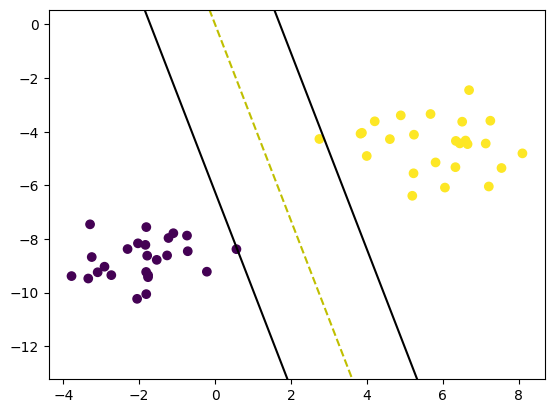

In [ ]:
visualize_svm(svm)

### SVM - SciKit Learn

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_blobs(
    n_samples=50,
    n_features=2,
    centers=2,
    cluster_std=1.05,
    random_state=40
)

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


In [ ]:
print(y_pred)
print(accuracy(y_test, y_pred))

[ 1  1  1 -1  1  1 -1 -1 -1  1]
1.0


In [ ]:
def visualize_svm(X, y, svm):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

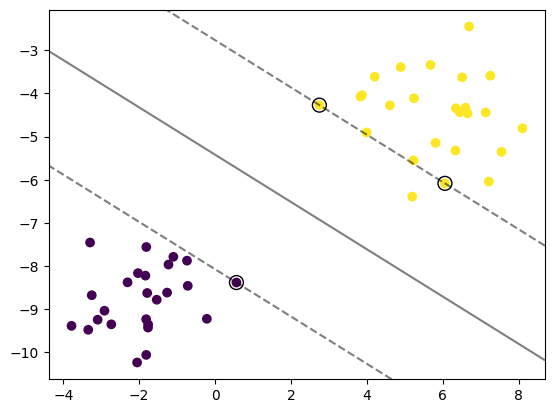

In [ ]:
visualize_svm(X, y, svm_clf)